<a href="https://colab.research.google.com/github/felipeeduardo90/Data-Science/blob/master/AnaliseViolenciaRio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project by: [Felipe Franco](https://github.com/felipeeduardo90)

# Analisando a Violência no Rio de Janeiro


O **Rio de Janeiro é um dos cartões postais do Brasil**. Famosa mundialmente por suas beleza naturais e pelo acolhedor povo brasileiro.
Eventos com o a semana do  Carnaval, na cidade do Rio, arrecadaram em 2019, **3,5 bilhões de reais**, e atrairam mais de **1,6 milhões de turistas**. Um aumento de 8% em relação ao ano anterior.

Mas apesar desse número positivo, é possível dizer que ele poderia ser ainda melhor.

No último balanço anual das cidades do mundo mais visitadas, feito pela empresa Euromonitor International, a cidade do Rio caiu 6 posições e já não figura mais entre as **100 cidades mais visitadas do mundo.**

> Será que a queda do números de turistas na cidade do Rio, a mais populosa e com maior infraestrutura do Estado, tem alguma relação com a segurança pública e violência?

Ao final dessa análise exploratótia, tentarei responder a essa pergunta.

- Neste projeto analisarei os dados estatístico dos crimes ocorridos no estado do Rio de Janeiro, desde a década de 90 até o registro mais recente, de 2019.



**Fontes:** https://bit.ly/2ULsHEd, https://bit.ly/3fAGi9t




In [0]:
# Importando pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Obtenção de dados

Obteremos os dados a partir do site oficial de dados abertos do estado do Rio de Janeiro, que pode ser acessado [aqui](http://www.ispdados.rj.gov.br/estatistica.html).

Dentro do site há também uma ferramenta muito interessante, onde é possível conferir dados por áreas de segurança de modo interativo, com o mapa do Estado. Acesse [aqui](http://www.ispvisualizacao.rj.gov.br/)

- Este Dataset já foi pré-analisado e limpo anteriormente.



In [0]:
# Importar o Dataset
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise inicial

Com o dataset importado, começaremos as análise do arquivo verificando quais informações temos disponíveis, se temos dados nulos e faltantes e com quais variáveis trabalharemos para melhor aproveitamento do conteúdo.

In [9]:
# Tamanho do nosso Data Frame
print("Entradas: ", df.shape[1])
print("Varáveis: ", df.shape[0])

Entradas:  56
Varáveis:  344


In [23]:
# Nomes das colunas (Entradas)
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [11]:
# Tipos de dados do Data Frame
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [12]:
# Checando as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [13]:
# Checando as 5 últimas entradas
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


### Resumo

Com a visualização dos tipos de variáveis e as cinco primeiras e últimas entradas do Data Frame, podemos observar com clareza como esses dados são apresentados:

- O Data Frame está dividido por ocorrências mensais, com resgistros do mês 1 (janeiro) de 1991 ao mês 8 (agosto) de 2019. 

Exemplificando com uma entrada aleatória dentro do DF:

In [14]:
df.loc[[300]]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
300,2016,1,406,2.0,18,53.0,518,6317,407.0,174.0,2827.0,618,123,3358,732,7209,814,2,1.0,1342.0,6.0,79.0,23.0,1366,15673,1515,3513,957.0,1741.0,147.0,8039,15912,0.0,137.0,5.0,3042.0,2249,935.0,1169.0,186.0,2341,2937.0,950.0,1372.0,86.0,5660.0,606.0,49,3.0,1.0,0.0,479,9365,3358,67980.0,3


Como o Data Frame é extenso, vamos verificar quantos valores ausentes ele contém, para evitar que isso seja um problema na análise.

In [15]:
# Valores ausentes
df.isnull().sum()

vano                            0
mes                             0
hom_doloso                      0
lesao_corp_morte               96
latrocinio                      0
hom_por_interv_policial        84
tentat_hom                      0
lesao_corp_dolosa               0
estupro                       144
hom_culposo                    84
lesao_corp_culposa             96
roubo_comercio                  0
roubo_residencia                0
roubo_veiculo                   0
roubo_carga                     0
roubo_transeunte                0
roubo_em_coletivo               0
roubo_banco                     0
roubo_cx_eletronico           144
roubo_celular                 108
roubo_conducao_saque          144
roubo_apos_saque              144
roubo_bicicleta               276
outros_roubos                   0
total_roubos                    0
furto_veiculos                  0
furto_transeunte                0
furto_coletivo                144
furto_celular                 144
furto_biciclet

## **Informações Estatísticas**

Usamos a função .describe() para obter uma visão estatísticas do dados. Podemos observar por exemplo, a média de diversos crimes, a mediana e também o número mínimo e o máximo de ocorrências de determinado delito em apenas um mês.

In [16]:
# Imprimir resultado estatístico do data frame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Dados estatísticos

Abaixo retornamos a média mensal arredondada de roubo e furto de veículos e a média de veículos recuperados.


Depois caculamos a porcentegem de ve[iculos que são recuperados pela polícia após um chamado de roubo ou furto.

- Neste caso um número interesse: 42,9% são recuperados.

In [17]:
# Média de roubo de veiculos
df_roubo = int(df.roubo_veiculo.mean())
print("A média de roubo de veículos mensal é de %s\n" % (df_roubo))

# Média de furtos
df_furto = int(df.furto_veiculos.mean())
print("A média de furto de veículos mensal é de %s\n" % (df_furto))

# Média de recuperação de veículos
df_rec = int(df.recuperacao_veiculos.mean())
print("A média de veiculos recuperados mensalmente é de %s" % (df_rec))

A média de roubo de veículos mensal é de 2448

A média de furto de veículos mensal é de 1674

A média de veiculos recuperados mensalmente é de 1772


In [18]:
# Porcentagem de veiculos recuperados em relação a soma de roubados e furtados

df_mean = (df_rec / (df_roubo + df_furto))
print("A média de veiculos recuperados em relação aos roubados e furtados é de %s %%" % round(df_mean*100,2))

A média de veiculos recuperados em relação aos roubados e furtados é de 42.99 %


## **Visualização de dados**

Por meio de alguns gráficos conseguimos uma boa visualização dos dados do Data Frame.





### Histograma de Homicídios Dolosos

Por exemplo, com o Histograma de hom_doloso, observamos que em mais de 40 meses dentro do período de análise, a quantidade de homícidios dolosos oscilou em 500 e 600 casos. Acima de 800 casos por mês ocorreu menos de 5 vezes durante o período.

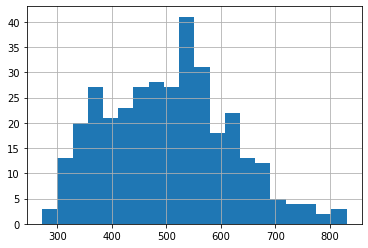

In [19]:
df.hom_doloso.hist(bins=20, rwidth=1)
plt.show()

### **Gráfico de linhas de roubo em coletivo**

Com esse gráfico podemos notar o crescimento adrupto em roubo dentro de coletivos nos últimos 50 meses, ou 4 anos e 2 meses, para melhor compreensão.

Até aproximadamente o início dos anos 2000, não havia sido registrado mais de 1000 casos dentro de um único mês no Estado. Já nos últimos 50 meses, a média se manteve acima de 1000 casos.

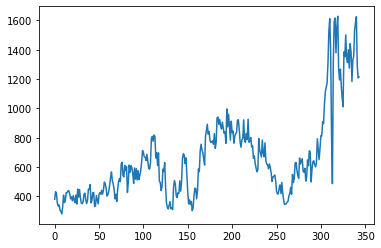

In [20]:
df.roubo_em_coletivo.plot();

- Observamos um correlação do aumento de roubos em coletivos com o de total de roubos no Estado. Isso mostra como a criminalidade aumentou de maneira geral no estado nos últimos anos.

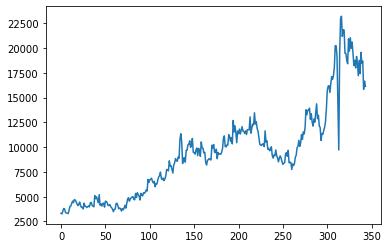

In [52]:
df.total_roubos.plot();

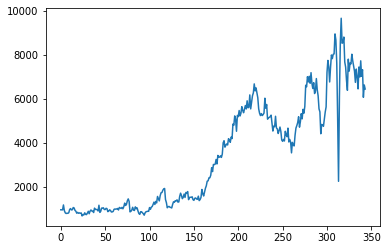

In [53]:
# Roubo a transeuntes
df.roubo_transeunte.plot();

- Vamos analisar a média de roubos a transeuntes, levando em conta os últimos 4 anos

In [31]:
# Média mensal de roubo a transeuntes nos ultimos 4 anos

df_rt = df.roubo_transeunte.iloc[293:343].mean()
print("A média mensal de roubo a transeuntes no estado é de: ", df_rt)

A média mensal de roubo a transeuntes no estado é de:  7049.48


In [35]:
# Roubo a transeuntes por minuto

# Minutos(mês) / roubos
df_rmin = 43200 / df_rt
print("No estado são registrado, em média %s roubos a transeuntes por minuto" % round(df_rmin, 2))

No estado são registrado, em média 6.13 roubos a transeuntes por minuto


### Proporção Estado x Capital

Para uma última análise, vamos encontrar qual a proporção da população do Estado do Rio de Janeiro com a capital, a cidade do Rio.

O Estado hoje tem aproximadamente 17 milhões de habitantes.
A cidade do Rio tem aproximamente 6,7 milhões de habitantes.

Para encontrar a porcentagem vamos aplicar uma regra de 3 simples.

In [0]:
# Proporcionalidade Estado x Cidade

def rule3(x, y):
  result = ((y*100) / x)
  print(result)

In [59]:
rule3(17, 6.7)

39.411764705882355


## **Conclusão**

Após essa análise, vamos voltar para a pergunta inicial:

> Será que a queda do números de turistas na cidade do Rio, a mais populosa e com maior infraestrutura do Estado, tem alguma relação com a segurança pública e violência?

Claro que para responder essa pegunta toda baseada em dados estatísticos, seria preciso analisar outros datasets e relacioná-los a uma grande quantidade de variáveis. Mas com essa análise superficial, já é possivel extrair bons argumentos:


- A média mensal de roubo junto com a de furto de veículos é de 4122. Isso também representa que em média, são registrados **10.4 roubos ou furtos de veículo no estado a cada minuto**.

- Destes roubos + furtos, em média **43% dos veículos são recuperados.**

- A criminalidade no Estado todo vem crescendo, e de forma acentuada nos últimos 5 anos.

- No estado são registrados em média, **6.13 roubos a transeuntes por minuto**. Transeuntes que aqui poderiam ser considerados pessoas passeando a pé.

- Se levarmos em conta que a cidade do Rio concentra aproximadamente 40%(39,4) da população do estado e usarmos isso como base para comparar com os dados globais teremos que:
-- Dessa média de 6.13 roubos a transeuntes por minuto, teoricamente **2.4, no mínimo, aconteceriam só na capital**.

- A capital recebeu dois grandes eventos esportivos nos últmos anos (Olimpíadas em 2016 e jogos da Copa América de Futebol em 2019) e mesmo assim a quantidade de turistas apresentou queda.

> A proporção entre o aumento da criminalidade e a queda no turismo, de acordo com esta análise, pode **sim** ter uma correlação.
É bom levar em consideração que outras variáveis não abordadas podem colaborar para o aumento da violência, como o aumento da população, taxa de desemprego, etc. Mas ao que tudo indica, índices ruins na segurança estão diretamente ligados a queda na procura por turismo na região.

